In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, recall_score, auc, roc_auc_score

!ls ../results

GoogLeNet_binary61_feature_imagenet_all.npy
GoogLeNet_binary61_feature_imagenet_test7600.npy
googlenet_weights.npy
logs
metrics
models
OEDCWPAL_PETA_features_all.pickle
PETA_coarse_to_fine_labels_pd.csv
PETA.csv
PETA_labels_pd.csv
PETA_lowerBody_labels_pd.csv
PETA_ratio_positive_samples_for_attributes.json
predictions
relation_array.npy
samples
state_transition_matrix.npy


In [2]:
labels_list_file = r"/home/anhaoran/data/pedestrian_attributes_PETA/PETA/labels.txt" 
labels_list_data = open(labels_list_file)
lines = labels_list_data.readlines()
attributes_list = []
for line in lines:
    data = line.split()
    #print(attr)
    attributes_list.append(data[1])
print("The total attributes labeled: ", len(attributes_list))
print(attributes_list)

The total attributes labeled:  65
['accessoryHeadphone', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'lowerBodyFormal', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'lowerBodyPlaid', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStockin

In [3]:
from keras.preprocessing import image

filename = r"../results/PETA.csv"
data = np.array(pd.read_csv(filename))[:, 1:]
length = len(data)
data_y = np.zeros((length, 61))
for i in range(length):
    data_y[i] = np.array(data[i, 1:1+61], dtype="float32")
y_test = data_y#[11400:]
print("The shape of the y_test is: ", y_test.shape)

Using TensorFlow backend.


The shape of the y_test is:  (19000, 61)


# Feature_PCA_plot

In [4]:
features = np.load("../results/GoogLeNet_binary61_feature_imagenet_all.npy")
print(features.shape)

(19000, 1000)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import PCA
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components).fit_transform(features)

accessoryHeadphone


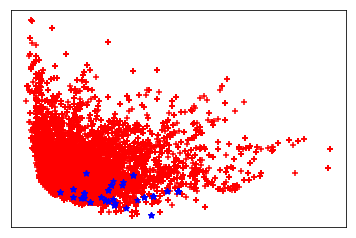

personalLess15


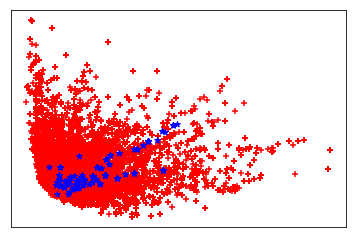

personalLess30


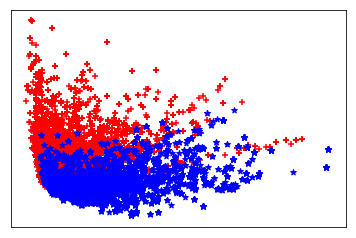

personalLess45


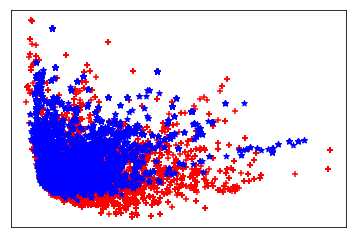

personalLess60


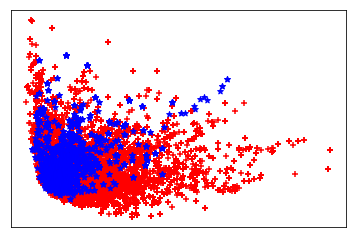

personalLarger60


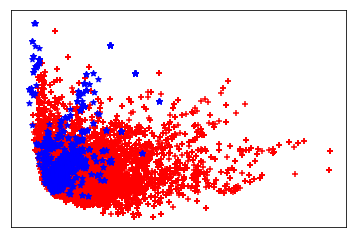

carryingBabyBuggy


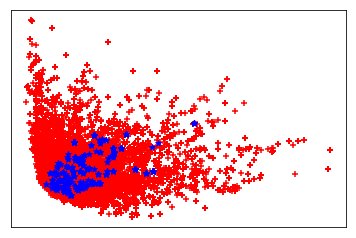

carryingBackpack


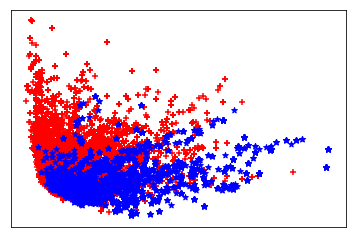

hairBald


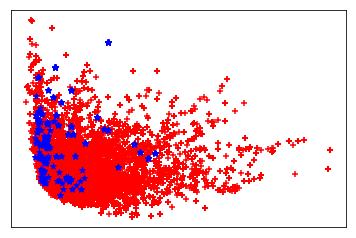

footwearBoots


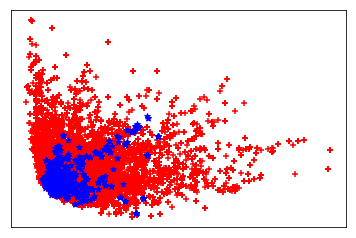

lowerBodyCapri


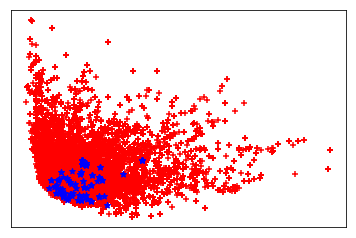

carryingOther


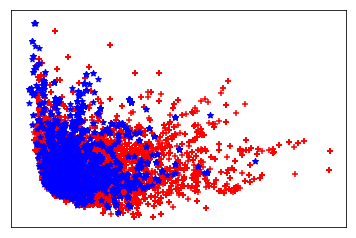

carryingShoppingTro


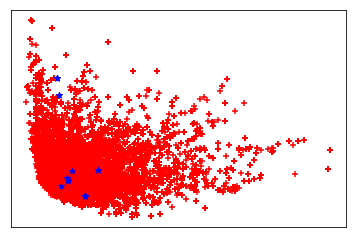

carryingUmbrella


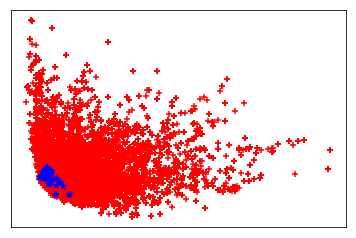

lowerBodyCasual


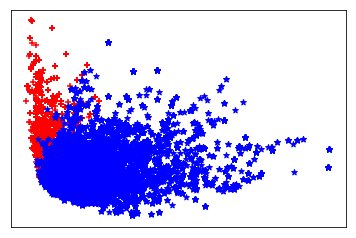

upperBodyCasual


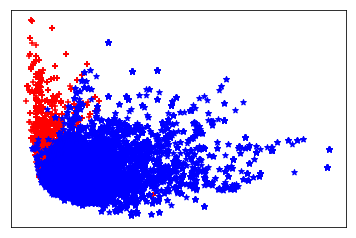

personalFemale


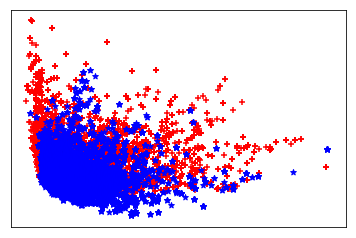

carryingFolder


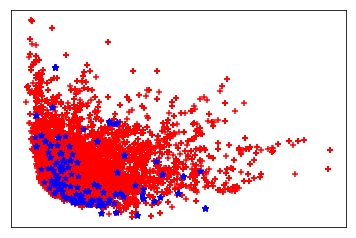

lowerBodyFormal


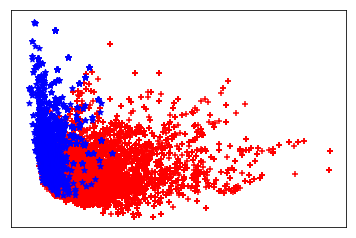

upperBodyFormal


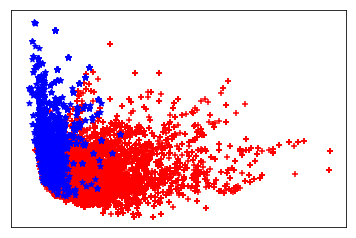

accessoryHairBand


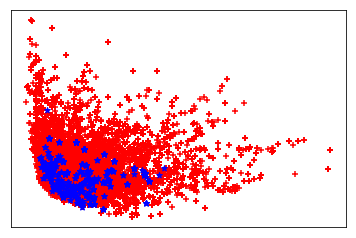

accessoryHat


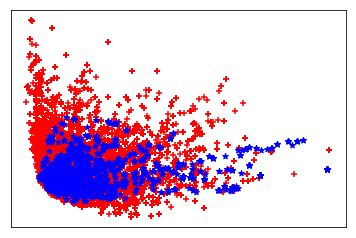

lowerBodyHotPants


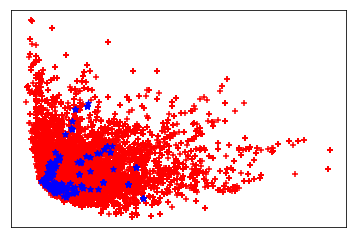

upperBodyJacket


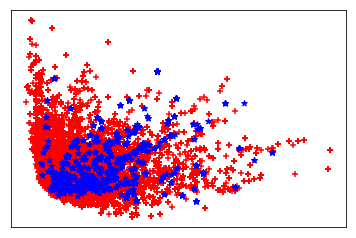

lowerBodyJeans


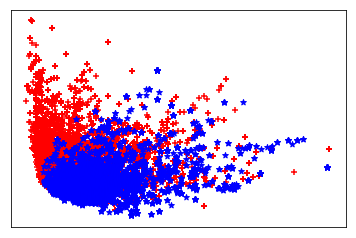

accessoryKerchief


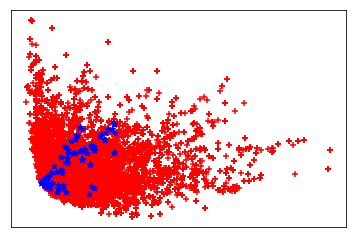

footwearLeatherShoes


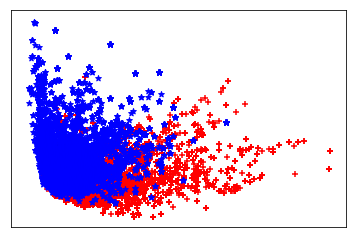

upperBodyLogo


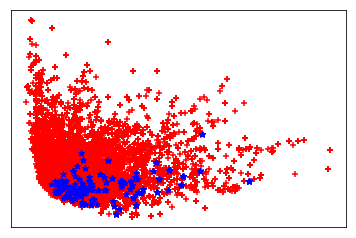

hairLong


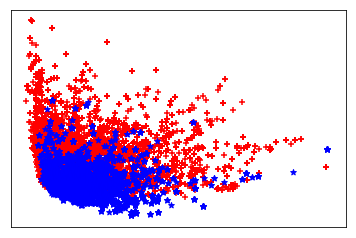

lowerBodyLongSkirt


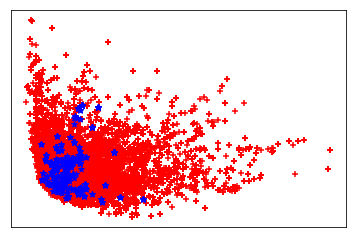

upperBodyLongSleeve


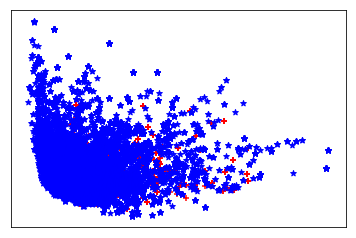

lowerBodyPlaid


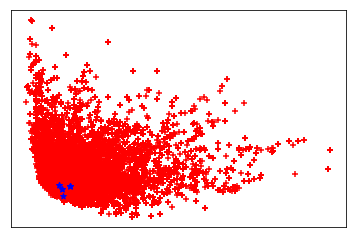

lowerBodyThinStripes


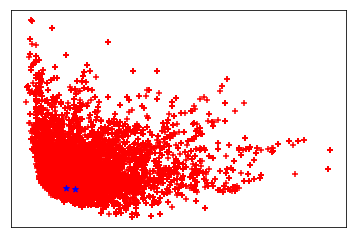

carryingLuggageCase


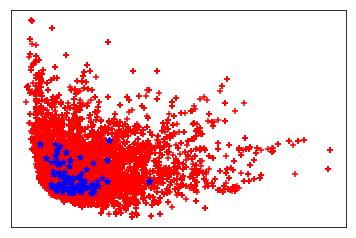

personalMale


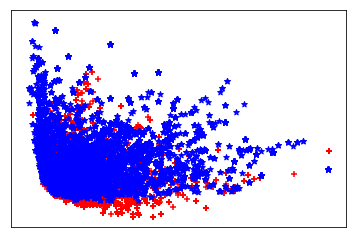

carryingMessengerBag


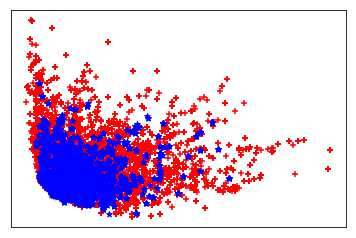

accessoryMuffler


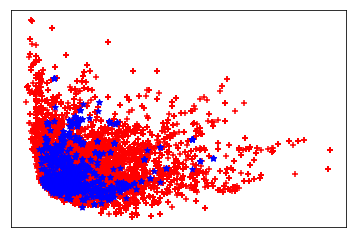

accessoryNothing


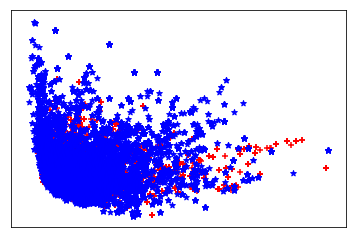

carryingNothing


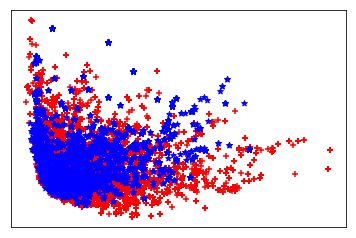

upperBodyNoSleeve


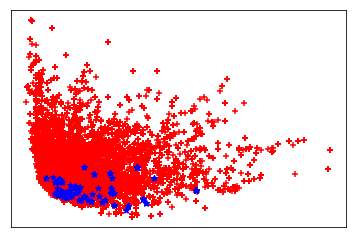

upperBodyPlaid


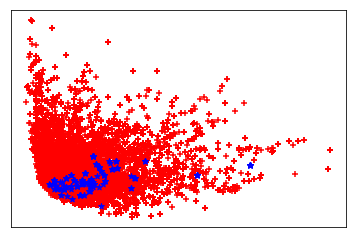

carryingPlasticBags


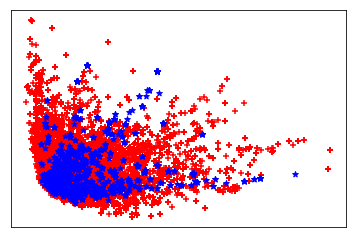

footwearSandals


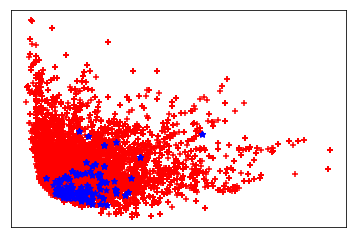

footwearShoes


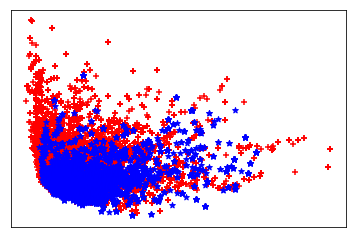

hairShort


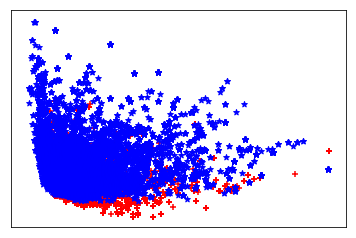

lowerBodyShorts


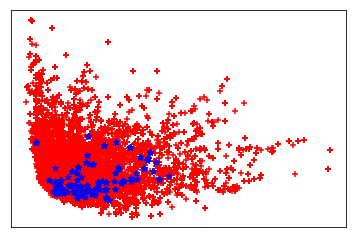

upperBodyShortSleeve


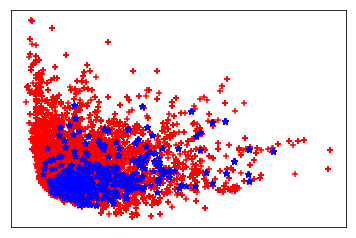

lowerBodyShortSkirt


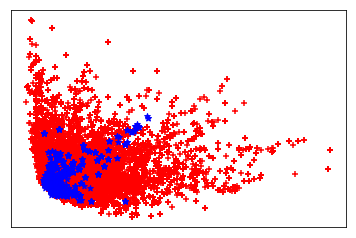

footwearSneakers


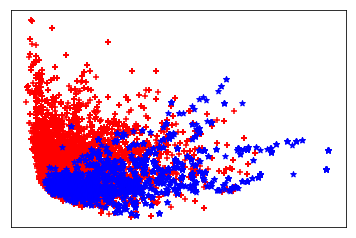

footwearStocking


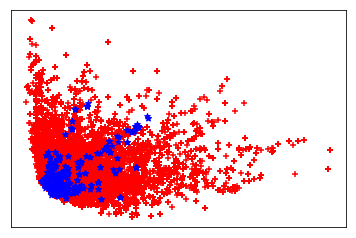

upperBodyThinStripes


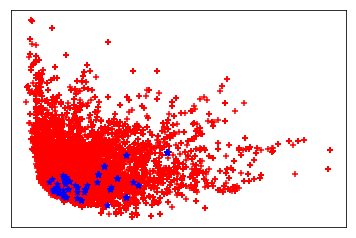

upperBodySuit


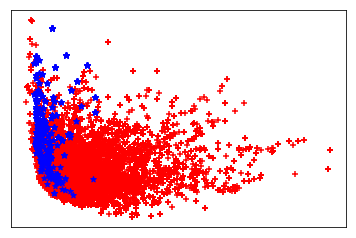

carryingSuitcase


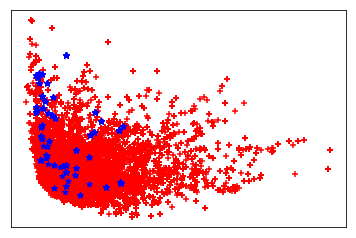

lowerBodySuits


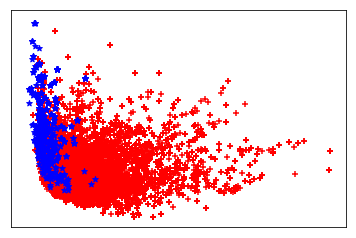

accessorySunglasses


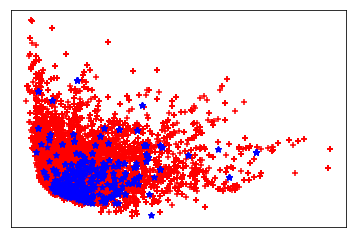

upperBodySweater


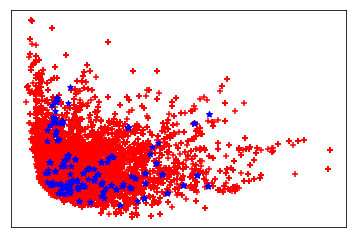

upperBodyThickStripes


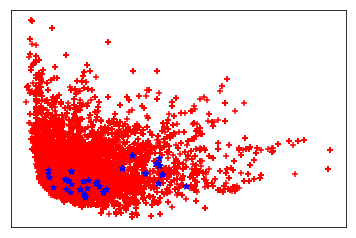

lowerBodyTrousers


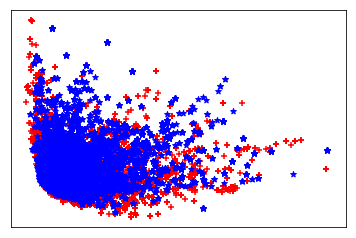

upperBodyTshirt


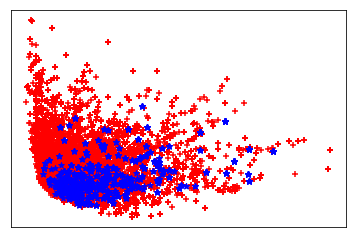

upperBodyOther


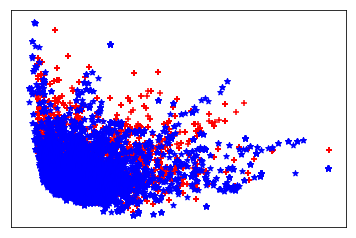

upperBodyVNeck


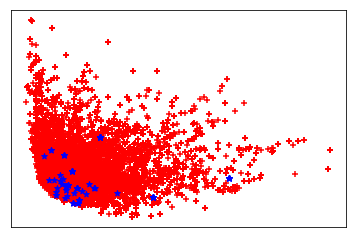

In [6]:
for i in range(61):
    print(attributes_list[i])
    idx = np.where(y_test[:, i]==0)
    plt.scatter(pca[idx, 0], pca[idx, 1], marker='+', color='r')
    idx = np.where(y_test[:, i]==1)
    plt.scatter(pca[idx, 0], pca[idx, 1], marker='*', color='b')
    plt.xticks(())
    plt.yticks(())
    plt.show()

# Predictions

In [7]:
def mA(y_pred, y_true):
    M = len(y_pred)
    res = 0
    P = sum(y_true)
    N = M - P
    TP = sum(y_pred*y_true)
    TN = list(y_pred+y_true == 0).count(True)
        #print(P,',', N,',', TP,',', TN)
    if P != 0:
        res += TP/P + TN/N
    else:
        res += TN/N
    return res / 2

In [10]:
predictions = np.load("../results/predictions/GoogLeNet_binary61_predictions_imagenet_all.npy")
predictions = np.array(predictions >= 0.5, dtype="float64")
print(predictions.shape)

diction = {}
for i in range(61):
    #print(attributes_list[i], end=":")
    diction.update({attributes_list[i]: mA(predictions[:, i], y_test[:, i])})

(19000, 61)


In [11]:
for key, value in diction.items():
        print(key, ':', value)

accessoryHeadphone : 0.9577750292036007
personalLess15 : 0.9562042626700734
personalLess30 : 0.9607984642024988
personalLess45 : 0.9497978161344864
personalLess60 : 0.9163069388762484
personalLarger60 : 0.9521345944887536
carryingBabyBuggy : 0.9605470735379573
carryingBackpack : 0.9604974489250144
hairBald : 0.9499221753277918
footwearBoots : 0.9075603098950269
lowerBodyCapri : 0.8874889102680523
carryingOther : 0.93719277877959
carryingShoppingTro : 0.921026289447342
carryingUmbrella : 0.875
lowerBodyCasual : 0.9676026247924459
upperBodyCasual : 0.9663000849845065
personalFemale : 0.9515084214542688
carryingFolder : 0.9466666581505345
lowerBodyFormal : 0.9657841051206787
upperBodyFormal : 0.9623631773168493
accessoryHairBand : 0.9519087384431852
accessoryHat : 0.9415695888171989
lowerBodyHotPants : 0.9185242480753122
upperBodyJacket : 0.9440015330793899
lowerBodyJeans : 0.9641952168428731
accessoryKerchief : 0.9004579065463718
footwearLeatherShoes : 0.9574455636345784
upperBodyLogo : 

In [17]:
for key, value in diction.items():
    if value <= 0.9:
        print(key, end=', ')
print()
for key, value in diction.items():
    if value > 0.9 and value <= 0.95:
        print(key, end=', ')
print()
for key, value in diction.items():
    if value <= 0.96 and value > 0.95:
        print(key, end=', ')
print()
for key, value in diction.items():
    if value > 0.96 and value <= 0.97:
        print(key, end=', ')
print()
for key, value in diction.items():
    if value > 0.97:
        print(key, end=', ')

lowerBodyCapri, carryingUmbrella, upperBodyLogo, lowerBodyPlaid, lowerBodyThinStripes, carryingLuggageCase, upperBodyNoSleeve, footwearSandals, footwearStocking, 
personalLess45, personalLess60, hairBald, footwearBoots, carryingOther, carryingShoppingTro, carryingFolder, accessoryHat, lowerBodyHotPants, upperBodyJacket, accessoryKerchief, carryingMessengerBag, accessoryMuffler, accessoryNothing, carryingNothing, upperBodyPlaid, footwearShoes, lowerBodyShorts, upperBodyShortSleeve, lowerBodyShortSkirt, footwearSneakers, upperBodyThinStripes, accessorySunglasses, upperBodySweater, upperBodyTshirt, upperBodyOther, upperBodyVNeck, 
accessoryHeadphone, personalLess15, personalLarger60, personalFemale, accessoryHairBand, footwearLeatherShoes, hairLong, upperBodyLongSleeve, personalMale, carryingPlasticBags, hairShort, upperBodyThickStripes, lowerBodyTrousers, 
personalLess30, carryingBabyBuggy, carryingBackpack, lowerBodyCasual, upperBodyCasual, lowerBodyFormal, upperBodyFormal, lowerBodyJea

# GoogLeNet_Feature_avg

In [18]:
avg_pos = []
for i in range(61):
    #print(attributes_list[i])
    """
    idx = np.where(y_test[:, i]==0)
    if len(idx) != 0:
        avg = np.average(pca[idx], axis=0)
        #print(avg.shape)
        plt.scatter(avg[0], avg[1], marker='+')
    idx = np.where(y_test[:, i]==1)
    if len(idx) != 0:
        avg = np.average(pca[idx], axis=0)
        plt.scatter(avg[0], avg[1], marker='*')
    """
    idx = np.where(y_test[:, i]==1)
    if len(idx) != 0:
        avg = np.average(features[idx], axis=0)
        avg_pos.append(avg)
        #plt.scatter(avg[0], avg[1], marker='*')
#plt.show()
print(np.shape(avg_pos))

(61, 1000)


In [19]:
import math

for i in range(61):
    for j in range(1000):
        if math.isnan(avg_pos[i][j]):
            print(i, ',', j, '--->', avg_pos[i][j])
            avg_pos[i][j] = 0

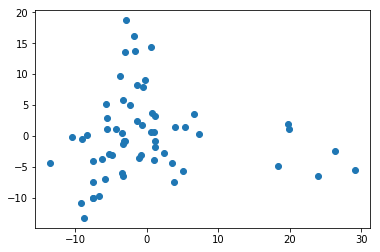

In [20]:
avg_pos = np.asarray(avg_pos, dtype="float64")
pca = PCA(n_components=n_components).fit_transform(avg_pos)
plt.scatter(pca[:, 0], pca[:, 1])
plt.show()

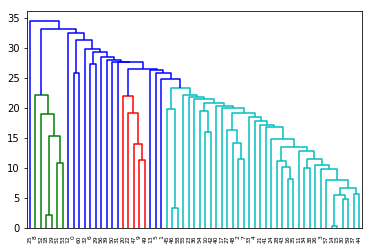

Original cluster by hierarchy clustering:
 [ 2 26  7 13 19 27  3  7  1  4  6 15 34 28 10 10  8 21  1  1  4 18  4 24
 16 35 14  7  8  3 10 29 33 20  9  8 23 11  9 31 22 17  6  8 11  5  5  4
  7  4 30  1  1  1  6 25 32 12  5 10  2]


In [22]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten

#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(avg_pos,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.pn
P=sch.dendrogram(Z)
plt.show()
#根据linkage matrix Z得到聚类结果:
cluster= sch.fcluster(Z, t=1, criterion='inconsistent') 

print("Original cluster by hierarchy clustering:\n",cluster)

In [35]:
#使用kmeans函数进行聚类,输入第一维为数据,第二维为聚类个数k.
#有些时候我们可能不知道最终究竟聚成多少类,一个办法是用层次聚类的结果进行初始化.当然也可以直接输入某个数值. 
#k-means最后输出的结果其实是两维的,第一维是聚类中心,第二维是损失distortion,我们在这里只取第一维,所以最后有个[0]
centroid=kmeans(avg_pos, 4)[0]#max(cluster)

#使用vq函数根据聚类中心对所有数据进行分类,vq的输出也是两维的,[0]表示的是所有数据的label
label=vq(avg_pos, centroid)[0] 

print("Final clustering by k-means:\n",label)

Final clustering by k-means:
 [1 0 0 1 1 1 1 0 2 3 1 1 0 1 1 1 1 1 2 2 3 1 3 0 1 1 1 0 1 3 1 1 0 1 0 1 1
 1 0 3 0 1 1 1 1 0 0 3 0 3 3 2 2 2 1 0 0 1 0 1 1]


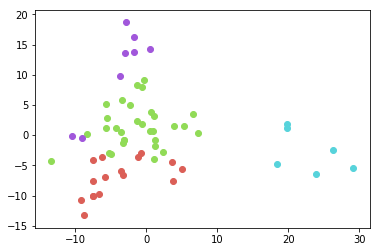

In [36]:
import seaborn as sns

palette = np.array(sns.color_palette("hls", max(label)+1))
#print(palette)
for i in range(61):
    plt.scatter(pca[i, 0], pca[i, 1], color=tuple(palette[label[i]]))
plt.show()

In [37]:
for k in range(max(label)+1):
    for i in range(len(label)):
        if label[i] == k:
            print(attributes_list[i], end=', ')
    print()

personalLess15, personalLess30, carryingBackpack, carryingShoppingTro, upperBodyJacket, upperBodyLogo, lowerBodyThinStripes, personalMale, carryingNothing, upperBodyPlaid, lowerBodyShorts, upperBodyShortSleeve, footwearSneakers, upperBodySweater, upperBodyThickStripes, upperBodyTshirt, 
accessoryHeadphone, personalLess45, personalLess60, personalLarger60, carryingBabyBuggy, lowerBodyCapri, carryingOther, carryingUmbrella, lowerBodyCasual, upperBodyCasual, personalFemale, carryingFolder, accessoryHat, lowerBodyJeans, accessoryKerchief, footwearLeatherShoes, hairLong, upperBodyLongSleeve, lowerBodyPlaid, carryingLuggageCase, carryingMessengerBag, accessoryMuffler, accessoryNothing, carryingPlasticBags, footwearSandals, footwearShoes, hairShort, accessorySunglasses, lowerBodyTrousers, upperBodyOther, upperBodyVNeck, 
hairBald, lowerBodyFormal, upperBodyFormal, upperBodySuit, carryingSuitcase, lowerBodySuits, 
footwearBoots, accessoryHairBand, lowerBodyHotPants, lowerBodyLongSkirt, upperBo

# Samples

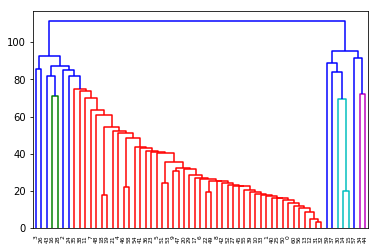

Original cluster by hierarchy clustering:
 [2 2 2 1 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 4 2 2
 3 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 3 2]


In [38]:
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(data_y.T,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.pn
P=sch.dendrogram(Z)
plt.show()
#根据linkage matrix Z得到聚类结果:
cluster= sch.fcluster(Z, t=1, criterion='inconsistent') 

print("Original cluster by hierarchy clustering:\n",cluster)

In [39]:
#使用kmeans函数进行聚类,输入第一维为数据,第二维为聚类个数k.
#有些时候我们可能不知道最终究竟聚成多少类,一个办法是用层次聚类的结果进行初始化.当然也可以直接输入某个数值. 
#k-means最后输出的结果其实是两维的,第一维是聚类中心,第二维是损失distortion,我们在这里只取第一维,所以最后有个[0]
centroid=kmeans(avg_pos, max(cluster))[0]#max(cluster)

#使用vq函数根据聚类中心对所有数据进行分类,vq的输出也是两维的,[0]表示的是所有数据的label
label=vq(avg_pos, centroid)[0] 

print("Final clustering by k-means:\n",label)

Final clustering by k-means:
 [1 2 1 2 2 2 2 1 0 2 2 2 2 2 2 2 2 1 0 0 2 2 2 2 2 3 2 1 2 2 2 1 1 2 2 2 2
 2 2 1 2 2 1 2 2 1 1 2 1 2 2 0 0 0 2 2 1 2 1 2 1]


In [40]:
for k in range(max(label)+1):
    for i in range(len(label)):
        if label[i] == k:
            print(attributes_list[i], end=', ')
    print()

hairBald, lowerBodyFormal, upperBodyFormal, upperBodySuit, carryingSuitcase, lowerBodySuits, 
accessoryHeadphone, personalLess30, carryingBackpack, carryingFolder, upperBodyLogo, lowerBodyPlaid, lowerBodyThinStripes, upperBodyNoSleeve, footwearSandals, lowerBodyShorts, upperBodyShortSleeve, footwearSneakers, upperBodyThickStripes, upperBodyTshirt, upperBodyVNeck, 
personalLess15, personalLess45, personalLess60, personalLarger60, carryingBabyBuggy, footwearBoots, lowerBodyCapri, carryingOther, carryingShoppingTro, carryingUmbrella, lowerBodyCasual, upperBodyCasual, personalFemale, accessoryHairBand, accessoryHat, lowerBodyHotPants, upperBodyJacket, lowerBodyJeans, footwearLeatherShoes, hairLong, lowerBodyLongSkirt, upperBodyLongSleeve, carryingLuggageCase, personalMale, carryingMessengerBag, accessoryMuffler, accessoryNothing, carryingNothing, upperBodyPlaid, carryingPlasticBags, footwearShoes, hairShort, lowerBodyShortSkirt, footwearStocking, upperBodyThinStripes, accessorySunglasses, 

# PCA_Feature

In [42]:
from keras.preprocessing import image

filename = r"../results/PETA.csv"
data = np.array(pd.read_csv(filename))[:, 1:]
length = len(data)
data_x = []
for i in range(length):
    img = image.load_img(data[i, 0], target_size=(160, 75, 3))
    img = image.img_to_array(img)
    img = img.reshape((-1, ))
    data_x.append(img)
data_x = np.asarray(data_x)
print("The shape is: ", data_x.shape)

The shape is:  (19000, 36000)


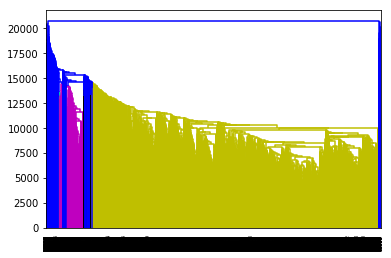

Original cluster by hierarchy clustering:
 [3091  702 2853 ... 3186 3189 1666]


In [43]:
pca_feature = PCA(n_components=1000).fit_transform(data_x)

In [45]:
avg_pos = []
for i in range(61):
    #print(attributes_list[i])
    """
    idx = np.where(y_test[:, i]==0)
    if len(idx) != 0:
        avg = np.average(pca[idx], axis=0)
        #print(avg.shape)
        plt.scatter(avg[0], avg[1], marker='+')
    idx = np.where(y_test[:, i]==1)
    if len(idx) != 0:
        avg = np.average(pca[idx], axis=0)
        plt.scatter(avg[0], avg[1], marker='*')
    """
    idx = np.where(y_test[:, i]==1)
    if len(idx) != 0:
        avg = np.average(pca_feature[idx], axis=0)
        avg_pos.append(avg)
        #plt.scatter(avg[0], avg[1], marker='*')
#plt.show()
print(np.shape(avg_pos))

(61, 1000)


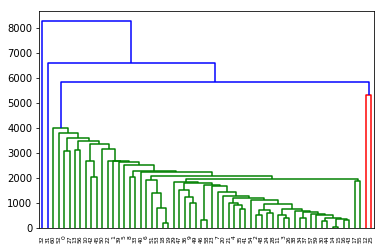

Original cluster by hierarchy clustering:
 [ 1 21  9 11  8 19  5 14  4  6  3 11 26  2 11 11 11 17  5  5 13  8 22 15
 10 26 11  1 10 16 11 27 28  4 11  8  6 11 11 20 18  8  3 11 11  3  7  6
  9  6 23  5 24  5 12 17  2 11  7 11 25]


In [46]:
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(avg_pos,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.pn
P=sch.dendrogram(Z)
plt.show()
#根据linkage matrix Z得到聚类结果:
cluster= sch.fcluster(Z, t=1, criterion='inconsistent') 

print("Original cluster by hierarchy clustering:\n",cluster)

In [63]:
#使用kmeans函数进行聚类,输入第一维为数据,第二维为聚类个数k.
#有些时候我们可能不知道最终究竟聚成多少类,一个办法是用层次聚类的结果进行初始化.当然也可以直接输入某个数值. 
#k-means最后输出的结果其实是两维的,第一维是聚类中心,第二维是损失distortion,我们在这里只取第一维,所以最后有个[0]
centroid=kmeans(avg_pos, 4)[0]#max(cluster)

#使用vq函数根据聚类中心对所有数据进行分类,vq的输出也是两维的,[0]表示的是所有数据的label
label=vq(avg_pos, centroid)[0] 

print("Final clustering by k-means:\n",label)

Final clustering by k-means:
 [0 0 0 0 1 1 0 0 0 1 3 0 1 1 0 0 0 0 0 0 0 1 1 0 0 3 0 1 0 1 0 3 2 1 0 1 1
 0 0 1 1 0 3 0 0 3 0 1 0 1 0 0 0 0 0 0 1 0 0 0 3]


In [64]:
for k in range(max(label)+1):
    for i in range(len(label)):
        if label[i] == k:
            print(attributes_list[i], end=', ')
    print()

accessoryHeadphone, personalLess15, personalLess30, personalLess45, carryingBabyBuggy, carryingBackpack, hairBald, carryingOther, lowerBodyCasual, upperBodyCasual, personalFemale, carryingFolder, lowerBodyFormal, upperBodyFormal, accessoryHairBand, upperBodyJacket, lowerBodyJeans, footwearLeatherShoes, hairLong, upperBodyLongSleeve, personalMale, accessoryNothing, carryingNothing, carryingPlasticBags, footwearShoes, hairShort, upperBodyShortSleeve, footwearSneakers, upperBodyThinStripes, upperBodySuit, carryingSuitcase, lowerBodySuits, accessorySunglasses, upperBodySweater, lowerBodyTrousers, upperBodyTshirt, upperBodyOther, 
personalLess60, personalLarger60, footwearBoots, carryingShoppingTro, carryingUmbrella, accessoryHat, lowerBodyHotPants, upperBodyLogo, lowerBodyLongSkirt, carryingLuggageCase, carryingMessengerBag, accessoryMuffler, upperBodyNoSleeve, upperBodyPlaid, lowerBodyShortSkirt, footwearStocking, upperBodyThickStripes, 
lowerBodyThinStripes, 
lowerBodyCapri, accessoryKer